In [1]:
%pylab notebook

from scipy.optimize import curve_fit

import sys, os, importlib, warnings, pandas as pd, seaborn as sns
warnings.filterwarnings("ignore")
import default_figure_style as dfs

sys.path.append('/Users/alexisdevitre/Documents/code/hts-irradiation')
import hts_fitting as hts
importlib.reload(hts)
importlib.reload(dfs)

#################################
########## Definitions ##########
#################################

energyPalette = sns.color_palette('hls', 4)

tcolors = {
    'f20': 'b',
    'f23': 'purple',
    'f28': 'magenta',
    'f29': 'k',
    'f33': 'r',
    'f34': 'g',
    'f37': 'orange'
}

label_suppression = 'Suppression $\mathrm{1 - I_c^{ON} / I_c^{OFF}}$'
label_degradation = 'Degradation $I_c^{OFF} / I_c^{0}$'

#################################
########## Correction ###########
#################################

def sqrt4(x, a, b, c, d):
    return a*np.sqrt(c*x+d)+b

#################################
########## Load data ############
#################################

masterfile = '../data/data-master.xlsx'
cols = [0, 1, 9, 12, 13, 14, 25, 27, 29, 31, 43, 45, 47, 48, 49, 51, 52, 55, 57, 58, 62, 63, 64, 66]
names = ['tapeid', 'installation', 'iBeam', 'eBeam', 'power', 
         'powerError', 'n0', 'noff', 'non', 'neq', 
         'tHTS_OFF', 'tTAR_OFF', 'tHTS_ON', 'tHTS_ONError', 'tTAR_ON', 
         'tHTS_EQ', 'tHTS_EQError', 'degradation', 'suppression', 'suppressionError', 
         'dtOffErr', 'dtOn', 'dtOnErr', 'outlier'
        ]
df = pd.read_excel(masterfile, sheet_name='data', usecols=cols, names=names, skiprows=1)

#################################
########## Filter data ##########
#################################
#cut &= df.installation == 1

cut = df.tTAR_OFF < 20
cut &= (df.suppression != np.nan) & (df.suppression > 0) & (df.suppressionError > 0)
data = df[cut]

print('\n\nTotal datapoints', data.iBeam.count())
for tapeid in data.tapeid.unique():
    print('\nDatapoints for', tapeid, data[data.tapeid==tapeid].iBeam.count())

df.columns

outputDirectory = '../figures/raw/'

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Total datapoints 687

Datapoints for f33 66

Datapoints for f20 14

Datapoints for f34 10

Datapoints for f29 302

Datapoints for f23 2

Datapoints for f28 69

Datapoints for f37 224


In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8), sharex=True, sharey=True)
fig.supxlabel('S(P) $\cdot$ S$_\mathrm{fit}$(36 mW) / S$_\mathrm{fit}$(P)', fontsize=18)
fig.supylabel('Histogram counts', fontsize=18)

nbins, density = 50, True


ax.legend(loc='upper left')
ax.set_ylim(0, 30)

fig.tight_layout()
plt.savefig('/Users/alexisdevitre/Desktop/snorm.png')

pd

In [ ]:
data.tapeid.unique()

<IPython.core.display.Javascript object>


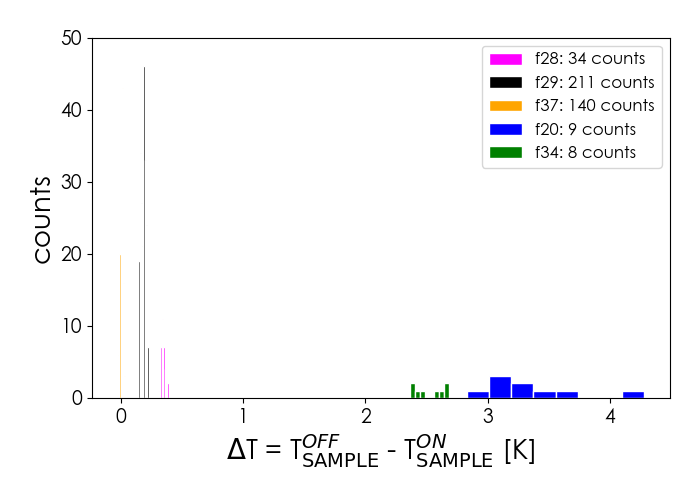

f28 0.34870970588235284 0.01821797139445145
f29 0.1851132701421804 0.020704798068679073
f37 0.0092019285714284 0.0111733726316669
f20 3.347862222222224 0.4237458819793345
f34 2.5214674999999995 0.13379954193280552


In [73]:
fig, ax = plt.subplots(1, 1)

for tape, nbins in zip(['f28', 'f29', 'f37', 'f20', 'f34'], [8, 8, 8, 8, 8]):
    d = data[(data.tapeid == tape) & (34 <= data.power) & (data.power <= 38)]
    x, y = d.power, d.tHTS_ON-d.tHTS_OFF
    ex, ey = d.powerError, d.tHTS_ONError
    #ax.plot(x, y, marker='o', linestyle='None', color=tcolors[tape], markersize=4, label=tape)
    ax.hist(y, bins=nbins, density=False, edgecolor='white', facecolor=tcolors[tape], label='{}: {} counts'.format(tape, len(y)))
    print(tape, y.mean(), y.std())
ax.set_xlabel('$\Delta$T = T$^{OFF}_\mathrm{SAMPLE}$ - T$^{ON}_\mathrm{SAMPLE}$ [K]')
ax.set_ylabel('counts')
ax.set_ylim(0, 50)
#ax.set_xlim(-.1, .4)
ax.legend()
fig.tight_layout()

#ax.set_rasterized(True)
#plt.savefig(outputDirectory+'figure04-resistance.svg', facecolor='white')

<IPython.core.display.Javascript object>


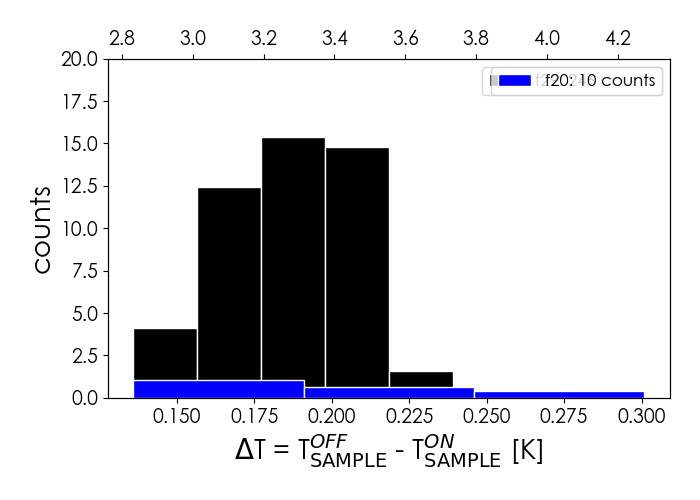

f20 3.3947910000000014 0.4261836454041846


In [89]:
fig, ax = plt.subplots(1, 1)
ax2 = ax.twiny()


tape = 'f29'
d = data[(data.tapeid == tape) & (32 <= data.power) & (data.power <= 40)]
x, y = d.power, d.tHTS_ON-d.tHTS_OFF
ex, ey = d.powerError, d.tHTS_ONError
ax.hist(y, bins=8, density=True, edgecolor='white', facecolor=tcolors[tape], label='{}: {} counts'.format(tape, len(y)))

tape = 'f20'
d = data[(data.tapeid == tape) & (32 <= data.power) & (data.power <= 40)]
x, y = d.power, d.tHTS_ON-d.tHTS_OFF
ex, ey = d.powerError, d.tHTS_ONError
ax2.hist(y, bins=3, density=True, edgecolor='white', facecolor=tcolors[tape], label='{}: {} counts'.format(tape, len(y)))
print(tape, y.mean(), y.std())

ax.set_xlabel('$\Delta$T = T$^{OFF}_\mathrm{SAMPLE}$ - T$^{ON}_\mathrm{SAMPLE}$ [K]')
ax.set_ylabel('counts')
ax.set_ylim(0, 20)
#ax.set_xlim(-.1, .4)
ax.legend()
ax2.legend()
fig.tight_layout()

#ax.set_rasterized(True)
#plt.savefig(outputDirectory+'figure04-resistance.svg', facecolor='white')